# GRU Model

The Gated Recurrent Unit (GRU) model is a type of Recurrent Neural Network (RNN) designed to capture temporal dependencies in sequential data. GRUs are particularly effective for time series forecasting due to their ability to remember long-term dependencies and handle varying time steps.

Performance Metrics:
Mean Squared Error (MSE): MSE measures the average of the squared differences between the actual and predicted values. Lower MSE indicates better model performance, meaning the GRU model’s predictions are closer to the actual CPU usage values. For GRU, you observed an MSE value that reflects how well the model’s predictions align with actual values. A lower MSE implies a better fit and less error.

R² Score: The R² score (or coefficient of determination) indicates how well the model explains the variance in the target variable. An R² score close to 1.0 suggests that the model explains a significant portion of the variance in CPU usage. For the GRU model, an R² score of around 0.61 implies that the model explains approximately 61% of the variance in the CPU usage data. While this indicates a moderate fit, there is room for improvement in capturing all the variations in the data.

Epoch 1/20


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0121
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0119
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0117
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0119
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0119
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.0118
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0119
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0117
Epoch 9/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0112
Epoch 10/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0118
Epoch 11/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0116
Epoch 12/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0113
Epoch 13/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0112
Epoch 14/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0114
Epoch 15/20
2500/2500 ━━━━

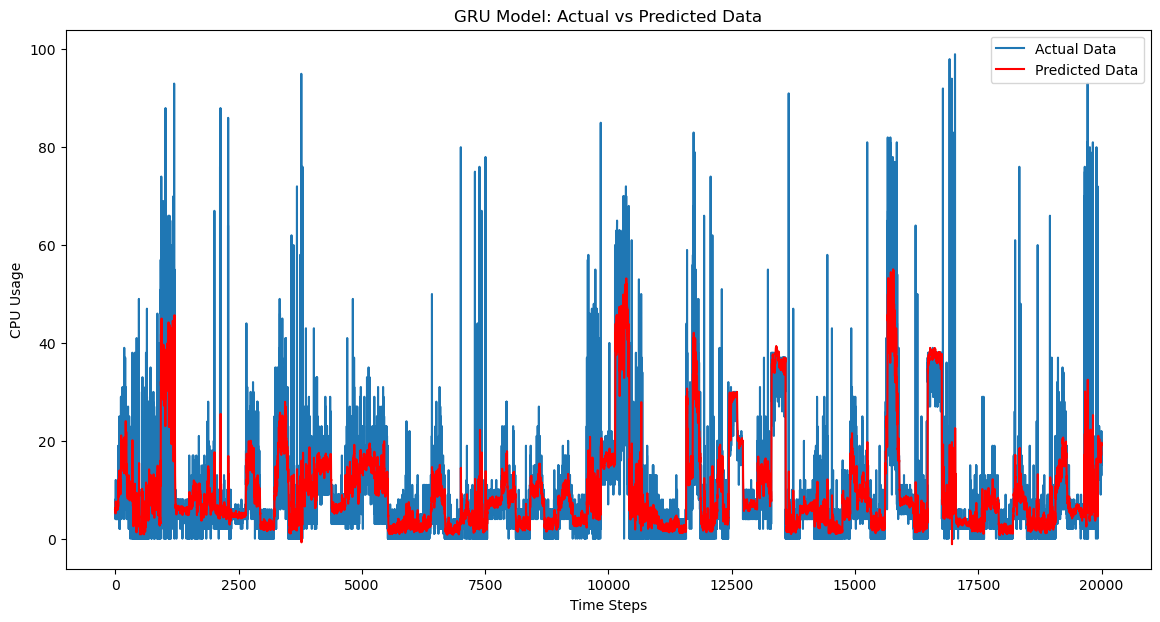

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Next 10 predicted values: [19.183979 19.485262 19.396059 19.13327  18.792473 18.316706 17.850927
 17.538696 17.281307 16.935648]


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv(r'C:\Users\ratho\OneDrive\Desktop\dataset1.txt', header=None, names=['CPU_Usage'])

# Feature Engineering: Adding a moving average
data['Moving_Avg'] = data['CPU_Usage'].rolling(window=10).mean().fillna(0)
features = data[['CPU_Usage', 'Moving_Avg']].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# Prepare data for GRU
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split data into training and test sets
train_size = 80000
test_size = 20000
X_train, X_test = X[:train_size], X[train_size:train_size + test_size]
y_train, y_test = y[:train_size], y[train_size:train_size + test_size]

# Custom loss function to penalize high errors
def custom_loss(y_true, y_pred):
    loss = K.mean(K.square(y_pred - y_true))
    penalty = K.mean(K.square(K.maximum(0., y_true - y_pred)))  # Penalize large errors
    return loss + 0.5 * penalty

# Build and train the GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(time_step, 2)))  # Increased units
model.add(GRU(100, return_sequences=False))  # Increased units
model.add(Dense(1))
model.compile(optimizer='adam', loss=custom_loss)

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # Increased epochs

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))]))[:, 0]
y_pred_inv = scaler.inverse_transform(np.hstack([y_pred, np.zeros((y_pred.shape[0], 1))]))[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual Data')
plt.plot(range(len(y_pred_inv)), y_pred_inv, label='Predicted Data', color='red')
plt.title('GRU Model: Actual vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

# Predict next 10 values using the last sequence from the test set
last_sequence = X_test[-1].reshape(1, time_step, 2)
future_predictions = []

for _ in range(10):
    pred = model.predict(last_sequence)
    future_predictions.append(pred[0, 0])
    
    # Update the sequence
    last_sequence = np.roll(last_sequence, shift=-1, axis=1)
    last_sequence[0, -1, 0] = pred[0, 0]
    # Calculate new moving average manually for future predictions
    moving_avg = np.mean(last_sequence[0, :, 0])
    last_sequence[0, -1, 1] = moving_avg  # Update moving average

# Rescale future predictions manually
min_val, max_val = scaler.data_min_[0], scaler.data_max_[0]
future_predictions = np.clip(future_predictions, min_val, max_val)
future_predictions = future_predictions * (max_val - min_val) + min_val

# Print next 10 predicted values
print(f'Next 10 predicted values: {future_predictions}')

Problems we are facing-

1. Prediction Out-of-Range Values: GRU predictions may sometimes fall outside the expected range, especially during peak periods.

2. Model Performance and Overfitting: The model might overfit to training data, affecting its ability to generalize to new data.

3. Sequence Length Issues: Inadequate sequence length can affect the model's ability to capture temporal dependencies.

4. Inverse Transformation Issues: Errors in the inverse transformation process can result in incorrect predictions.

5. Training Time and Resources: Training the GRU model can be computationally expensive and time-consuming.

6. Future Prediction Sequence Handling: Incorrectly updating sequences for future predictions can lead to inaccurate results.

# GRU + Linear Regression Model

Epoch 1/20


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0122
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0118
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0118
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0117
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0118
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0117
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0119
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0113
Epoch 9/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0115
Epoch 10/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0119
Epoch 11/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0117
Epoch 12/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0114
Epoch 13/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0117
Epoch 14/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0115
Epoch 15/20
2500/2500 ━━━━

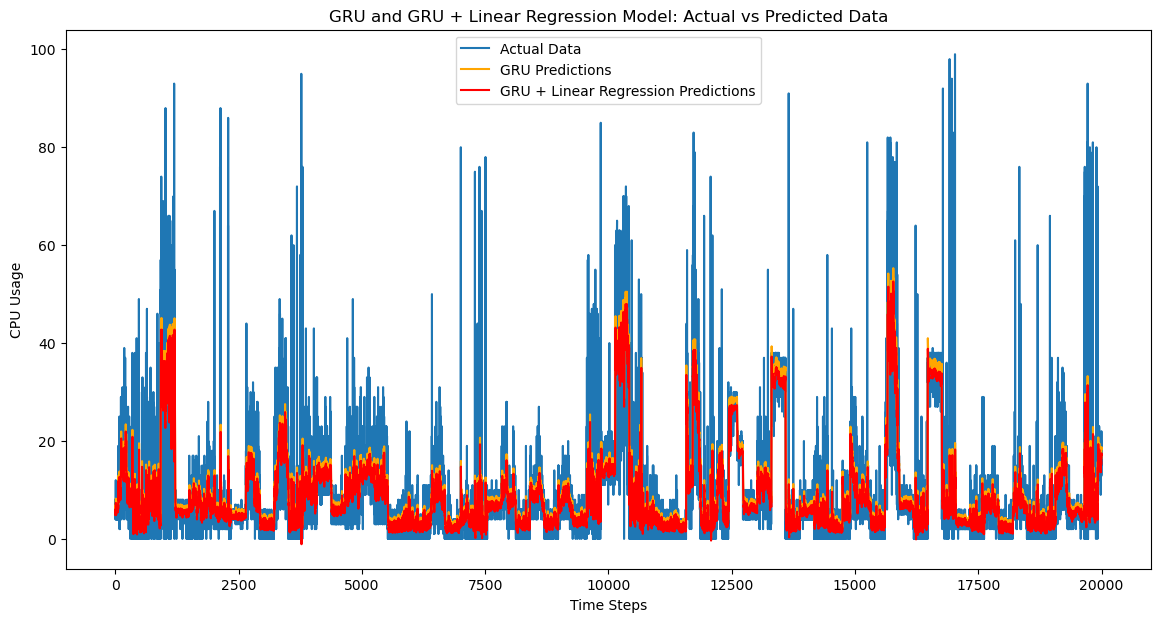

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from math import sqrt

# Load dataset
data = pd.read_csv(r'C:\Users\ratho\OneDrive\Desktop\dataset1.txt', header=None, names=['CPU_Usage'])

# Feature Engineering: Adding a moving average
data['Moving_Avg'] = data['CPU_Usage'].rolling(window=10).mean().fillna(0)
features = data[['CPU_Usage', 'Moving_Avg']].values

# Normalize data
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(data[['CPU_Usage']])

# Prepare data for GRU
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_features, time_step)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split data into training and test sets
train_size = 80000
test_size = 20000
X_train, X_test = X[:train_size], X[train_size:train_size + test_size]
y_train, y_test = y[:train_size], y[train_size:train_size + test_size]

# Custom loss function to penalize high errors
def custom_loss(y_true, y_pred):
    loss = K.mean(K.square(y_pred - y_true))
    penalty = K.mean(K.square(K.maximum(0., y_true - y_pred)))  # Penalize large errors
    return loss + 0.5 * penalty

# Build and train the GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(time_step, 2)))  # Increased units
model.add(GRU(100, return_sequences=False))  # Increased units
model.add(Dense(1))
model.compile(optimizer='adam', loss=custom_loss)

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # Increased epochs

# Predict on the test set
gru_predictions = model.predict(X_test)
gru_predictions = scaler_target.inverse_transform(gru_predictions)

# Fit linear regression on GRU predictions
lr_model = LinearRegression()
lr_model.fit(gru_predictions, scaler_target.inverse_transform(y_test.reshape(-1, 1)))
lr_predictions = lr_model.predict(gru_predictions)

# Calculate metrics
mse_lr = mean_squared_error(scaler_target.inverse_transform(y_test.reshape(-1, 1)), lr_predictions)
rmse_lr = sqrt(mse_lr)
print(f'GRU + Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}')

# Predict next 10 values using the GRU model
last_sequence = scaled_features[-time_step:].reshape(1, time_step, 2)
future_predictions = []

for _ in range(10):
    pred = model.predict(last_sequence)
    future_predictions.append(pred[0, 0])
    # Update the sequence
    last_sequence = np.roll(last_sequence, shift=-1, axis=1)
    last_sequence[0, -1, 0] = pred[0, 0]
    # Calculate new moving average manually for future predictions
    moving_avg = np.mean(last_sequence[0, :, 0])
    last_sequence[0, -1, 1] = moving_avg  # Update moving average

# Convert future predictions to numpy array and reshape
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions_inv = scaler_target.inverse_transform(future_predictions)

# Refine future predictions with Linear Regression
future_predictions_lr = lr_model.predict(future_predictions_inv)

# Print next 10 predicted values (GRU + Linear Regression)
print(f'Next 10 predicted values (GRU + Linear Regression): {future_predictions_lr.flatten()}')

# Plot actual vs predicted values (for verification)
plt.figure(figsize=(14, 7))
plt.plot(range(len(gru_predictions)), scaler_target.inverse_transform(y_test.reshape(-1, 1)), label='Actual Data')
plt.plot(range(len(gru_predictions)), gru_predictions, label='GRU Predictions', color='orange')
plt.plot(range(len(gru_predictions)), lr_predictions, label='GRU + Linear Regression Predictions', color='red')
plt.title('GRU and GRU + Linear Regression Model: Actual vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

Using GRU + Linear Regression improves predictions by better handling out-of-range values and smoothing predictions, addressing some issues with the GRU model. However, it doesn't fully resolve problems with sudden spikes or the sequence length limitations inherent in the GRU model. The combined model has a similar R² score of around 61%, indicating moderate performance but still struggles with high volatility and rapid changes in the data.